In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
def func2(X,y,alpha):
    n,d = X.shape
    s = np.zeros(d)
    for i in range(n):
        s+=alpha[i]*y[i]*X[i]
    f = (np.linalg.norm(s)**2 )/2
    return f

In [3]:
def gradient(X,y,alpha):
    n,d = X.shape
    ayx = np.zeros(d)
    for i in range(n):
        ayx +=alpha[i]*y[i]*X[i]
    g = np.zeros(n)
    for i in range(n):
        g[i] = y[i]*(np.inner(X[i],ayx))
    return g

In [25]:
X = [[1,1],[1,-1],[-1,1],[-1,-1]]
X = np.array(X)

Y = np.array([1,1,1,-1])
alpha = np.array([1/3,1/3,1/3,1])


In [5]:
def Cauchy(alpha, y,z, X):
    n,d = X.shape
    ayx = np.zeros(d)
    azyx = np.zeros(d)
    for i in range(n):
        ayx += alpha[i]*y[i]*X[i]
        azyx += (z[i] - alpha[i])*y[i]*X[i]
    upper = -np.inner(azyx,ayx)
    lower = np.linalg.norm(azyx)**2
    eta = upper/lower
    if eta < 0:
        eta = 0
    if eta > 1:
        eta = 1
    return eta

In [6]:
def pol(X, y, alpha):
    n,d = X.shape
    w = np.zeros(d)
    for i in range(n):
        w +=alpha[i]*y[i]*X[i]
    z = np.zeros(n)
    pos = True
    neg = True
    beta = np.dot(X,w)
    positive_value = []
    negative_value = []
    for i in range(n):
        if y[i] == 1:
            positive_value.append(beta[i])
        else:
            negative_value.append(beta[i])
    for i in range(n):
        if y[i] == 1 and beta [i] == min(positive_value) and pos:
            pos = False
            z[i] = 1
        if y[i] == -1 and beta[i] == min(negative_value) and neg:
            pos = False
            z[i] = 1
    return z

In [9]:
def condgrad(X,y,alpha,stepsize,tol = 1e-3, maxiter = 1000):
    f_value = []
    cc = 0
    for t in range(maxiter):
        f_t = func2(X,y,alpha)
        f_value.append(f_t)
        g = gradient(X,y,alpha)
        z = pol(X, y, alpha)
        
        #print("valiue is ", np.dot(alpha-z,g))
        if np.dot(alpha-z,g) <= tol:
            break
        
        
        if stepsize == 'const':
            eta = 2/(t+2)
        else:
            eta = Cauchy(alpha,y,z,X)
        alpha = (1.0-eta)*alpha + eta*z
        
    return alpha,f_value

In [16]:
beta,f_value1 = condgrad(X,Y,alpha,'const',tol = 1e-3, maxiter = 100)

In [17]:
beta

array([0.       , 0.5049505, 0.4950495, 1.       ])

In [18]:
n,d = X.shape
w = np.zeros(d)
for i in range(len(beta)):
     w +=beta[i]*Y[i]*X[i]
b = 1/Y[1] - np.dot(w,X[1])
b

0.980198019801981

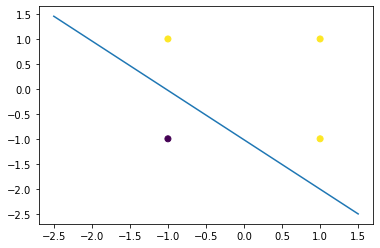

In [19]:
#1.4
x_point = np.array([1,1,-1,-1])
y_point = np.array([1,-1,1,-1])
label = Y
plt.scatter(x_point, y_point, c = label)
x = np.linspace(-2.5,1.5,120)
y = -w[0]/w[1] -b/w[1] *x
plt.plot(x,y)
#w0x+w1y + b = 0
#y = -w0/w1x -b/w1

In [20]:
#1.5
beta,f_value1 = condgrad(X,Y,alpha,'const',tol = 1e-3, maxiter = 100)
beta,f_value2 = condgrad(X,Y,alpha,'cont',tol = 1e-3, maxiter = 100)

In [26]:
t1 = list(range(0, 100))
t2 = []
for i in range(len(t1)):
    t2.append(8/(t1[i]+3))

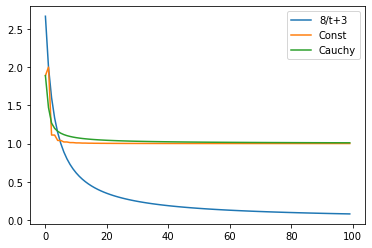

In [27]:
plt.plot(t1,t2,label="8/t+3")
plt.plot(t1,f_value1,label = 'Const')
plt.plot(t1,f_value2, label = 'Cauchy')
plt.gca().legend(('8/t+3','Const','Cauchy'))